<a href="https://colab.research.google.com/github/PunnawatSiri/Complexity_Science_Course/blob/main/Segregation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Schelling's Segregation Model

In 1971, economist Thomas Schelling reported an agent-based simulation study where he found that communities can become segregated in the absence of discriminatory laws, if individual households have a small preference to live beside households of similar ethnicity.

<figure>
    <img src="https://upload.wikimedia.org/wikipedia/commons/6/63/Thomas_Schelling.jpg" width=200>
    <figcaption>Thomas Schelling (1921-2016)</figcaption>
</figure>

In his simulation, Schelling placed pennies and dimes (representing households) on a grid drawn on a large piece of paper, and checked each and every coin manually to see if they are 'happy'. A coin (household) is 'happy' if at least a proportion $B$ of its eight neighbors are of the same type. Then, at every turn, 'happy' coins stay put, while 'unhappy' coins were moved to random empty sites.

After running the simulation many turns, Schelling discovered that the community is well-mixed, if $B < \frac{1}{3}$. On the other hand, if $B > \frac{1}{3}$, the community become segregated.

## Programming the Model

Today, with fast computers, we can do a simulation of Schelling's segregation model for many turns in the blink of an eye. In this exercise, let us learn how to write a Python code to do so.

First, we will need a grid with $L_x \times L_y$ cells, on which $N < L_x L_y$ will reside.

In [3]:
# import numpy
import numpy as np
# set Lx = Ly = L
L = 50
# create grid
city = np.zeros((L,L))

In the grid we have created, we have $L \times L = 2500$ cells. Let us put $N_1 = 1000$ households of type 1 and $N_2 = 1000$ households of type 2 on the grid. The remaining $500$ cells will be vacant, where unhappy households can move into.

To put $N_1 + N_2$ households onto the grid with no overlaps, let us shuffle the array <code>k = np.arange(L*L)</code>. Then, for each $k$, we obtain the location $(i, j)$ of the household by letting $i = k//L$ and $j = k - i*L$.

In [4]:
# set N1 and N2
N1 = 1000
N2 = 1000
# shuffle the array from 0 to 2499
k = np.arange(L*L)
np.random.shuffle(k)
for l in range(N1):
    i = k[l]//L
    j = k[l] - i*L
    city[i,j] = 1
for l in range(N1,N1+N2):
    i = k[l]//L
    j = k[l] - i*L
    city[i,j] = 2

To see what this city is like, let us use <code>matshow()</code> in the <code>PyPlot</code> package.

In [16]:
# import matplotlib
import matplotlib.pyplot as plt

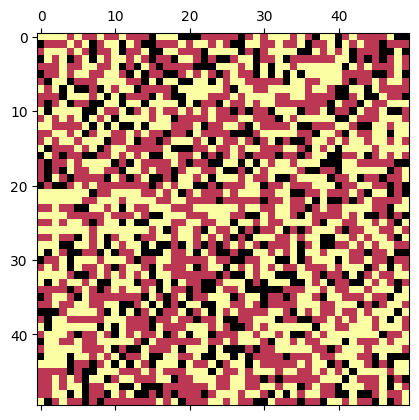

In [ ]:
# view the city
plt.matshow(city,cmap='inferno')
plt.axis('equal')
plt.show()

To make the simulation efficient, let us introduce two arrays, <code>vacant</code>, and <code>unhappy</code>. The array <code>vacant</code> keeps track of all the vacant sites, updating them as necessary, but will remain the same size throughout the simulation. The array <code>unhappy</code> keeps track of unhappy households. Its size can vary during the simulation, but may decrease to zero at the end of the simulation, if all households can be satisfied.

In [ ]:
vacant = []
for i in range(L):
    for j in range(L):
        if city[i,j] == 0.0:
            vacant.append([i,j])

### Define satisfaction function

Next, because <code>unhappy</code> is tedious to compute, and because we need to compute it every turn, it is best we define a function to do it.

In [7]:
def satisfaction(city, B):
    # initialize empty unhappy array
    unhappy = []
    # loop through i
    for i in range(len(city)):
        if i == 0:
            for j in range(len(city[i])):
                if j == 0:
                    if city[i,j] > 0:
                        if (city[i,j+1] == city[i,j]) + (city[i+1,j+1] == city[i,j]) + (city[i+1,j] == city[i,j]) < B*3:
                            unhappy.append([i,j])
                elif j == len(city[i])-1:
                    if city[i,j] > 0:
                        if (city[i,j-1] == city[i,j]) + (city[i+1,j-1] == city[i,j]) + (city[i+1,j] == city[i,j]) < B*3:
                            unhappy.append([i,j])
                else:
                    if city[i,j] > 0:
                        if (city[i,j+1] == city[i,j]) + (city[i+1,j+1] == city[i,j]) + (city[i+1,j] == city[i,j]) + (city[i+1,j-1] == city[i,j]) + (city[i,j-1] == city[i,j]) < B*5:
                            unhappy.append([i,j])
        elif i == len(city)-1:
            for j in range(len(city[i])):
                if j == 0:
                    if city[i,j] > 0:
                        if (city[i,j+1] == city[i,j]) + (city[i-1,j+1] == city[i,j]) + (city[i-1,j] == city[i,j]) < B*3:
                            unhappy.append([i,j])
                elif j == len(city[i])-1:
                    if city[i,j] > 0:
                        if (city[i-1,j] == city[i,j]) + (city[i-1,j-1] == city[i,j]) + (city[i,j-1] == city[i,j]) < B*3:
                            unhappy.append([i,j])
                else:
                    if city[i,j] > 0:
                        if (city[i,j-1] == city[i,j]) + (city[i-1,j-1] == city[i,j]) + (city[i-1,j] == city[i,j]) + (city[i-1,j+1] == city[i,j]) + (city[i,j+1] == city[i,j]) < B*5:
                            unhappy.append([i,j])
        else:
            for j in range(len(city[i])):
                if j == 0:
                    if city[i,j] > 0:
                        if (city[i-1,j] == city[i,j]) + (city[i-1,j+1] == city[i,j]) + (city[i,j+1] == city[i,j]) + (city[i+1,j+1] == city[i,j]) + (city[i+1,j] == city[i,j]) < B*5:
                            unhappy.append([i,j])
                elif j == len(city[i])-1:
                    if city[i,j] > 0:
                        if (city[i+1,j] == city[i,j]) + (city[i+1,j-1] == city[i,j]) + (city[i,j-1] == city[i,j]) + (city[i-1,j-1] == city[i,j]) + (city[i-1,j] == city[i,j]) < B*5:
                            unhappy.append([i,j])
                else:
                    if city[i,j] > 0:
                        if (city[i,j+1] == city[i,j]) + (city[i+1,j+1] == city[i,j]) + (city[i+1,j] == city[i,j]) + (city[i+1,j-1] == city[i,j]) + (city[i,j-1] == city[i,j]) + (city[i-1,j-1] == city[i,j]) + (city[i-1,j] == city[i,j]) + (city[i-1,j+1] == city[i,j]) < B*8:
                            unhappy.append([i,j])
    return unhappy

In [ ]:
unhappy = satisfaction(city, 0.2)

In [ ]:
len(unhappy)

1861

### Define move funtion

As expected, most households are unhappy, since their initial locations were randomly assigned. To make them happy, we must allow them to move to random vacant sites. Again, since we need to do so once every turn, we will define a function to do so.

In [8]:
def move(city, vacant, unhappy):
    # in this function, we will move all unhappy households to
    # new sites. We can always do this because once an unhappy
    # household move away, its original site becomes vacant
    #
    # find number of unhappy households
    N = len(unhappy)
    # loop over all unhappy households
    for n in range(N):
        # original location of unhappy household
        i0 = unhappy[n][0]
        j0 = unhappy[n][1]
        # random vacant site
        k = np.random.randint(len(vacant))
        # new location to move to
        i1 = vacant[k][0]
        j1 = vacant[k][1]
        # update vacant site (i0,j0) -> (i1,j1)
        vacant[k] = [i0,j0]
        # household type
        c = city[i0,j0]
        # update city
        city[i1,j1] = c
        city[i0,j0] = 0.0
    return city

Let us run this function once, to see how many unhappy households we can satisfy.

In [ ]:
city = move(city, vacant, unhappy)

Let us view the city after one round of moves, to see what differences they made.

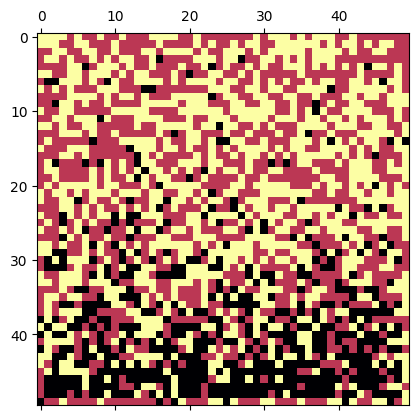

In [ ]:
# view the city
plt.matshow(city,cmap='inferno')
plt.axis('equal')
plt.show()

We see that there were some changes, but the spatial nature of the changes is difficult to describe, so we go back to using the number of unhappy household as the figure of merit.

In [ ]:
unhappy = satisfaction(city, 0.2)
len(unhappy)

1827

As we can see, the number of unhappy households has gone down. Therefore, allowing unhappy households to move does increase the overall happiness of the community.

## Long-Time Behavior of Schelling's Segration Model

For our choice of $B = 0.2$, let us see how happy we can make the community. For example, is it possible to have zero unhappy households? Or are we going to end up with some steady-state number of unhappy households? If the latter, how large is this number?

To answer these questions, let us simulate Schelling's segregation model over 100 time steps, and see how the number $M$ of unhappy households change.

In [ ]:
# initialize array to store number of unhappy households
M = []
# number of time steps to simulate
T = 100
# run simulations
for t in range(T):
    # find unhappy households
    unhappy = satisfaction(city, 0.2)
    # record number of unhappy households
    M.append(len(unhappy))
    # move households
    city = move(city, vacant, unhappy)

Let us plot $M$ against $t$:

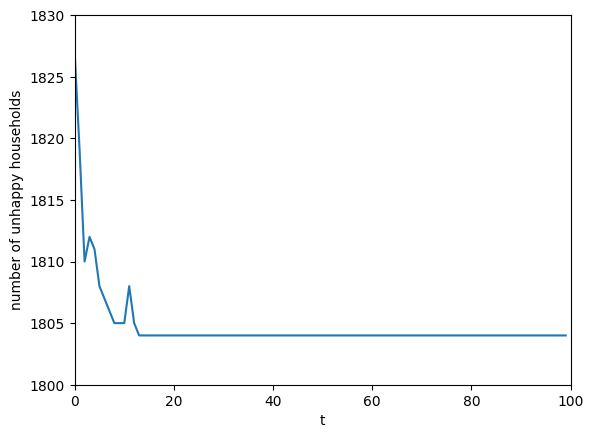

In [ ]:
plt.plot(M)
plt.axis([0,100,1800,1830])
plt.xlabel('t')
plt.ylabel('number of unhappy households')
plt.show()

As we can see, the number of unhappy households decreases rapidly to between $1804 \leq M \leq 1805$ shortly after 10 iterations. Shortly before 40 iterations, the number of unhappy households remains constant at $M = 1804$. Since we have only 2000 households in the simulation, this seemed like a highly-unhappy community.

Let us also visualize the steady-state city.

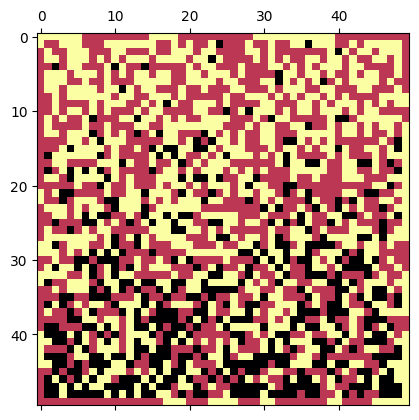

In [ ]:
# view the city
plt.matshow(city,cmap='inferno')
plt.axis('equal')
plt.show()

As we can see, the patches appear to be larger than those seen earlier, but the community appears to be still well-mixed.

Let us run another set of simulations with $B = 0.5 > \frac{1}{3}$, for $T = 100$ time steps, to see how different the situation will be.

In [ ]:
M = []
# run simulations
for t in range(T):
    # find unhappy households
    unhappy = satisfaction(city, 0.5)
    # record number of unhappy households
    M.append(len(unhappy))
    # move households
    city = move(city, vacant, unhappy)

If we now plot the number of unhappy households, we find that all of them are unhappy.

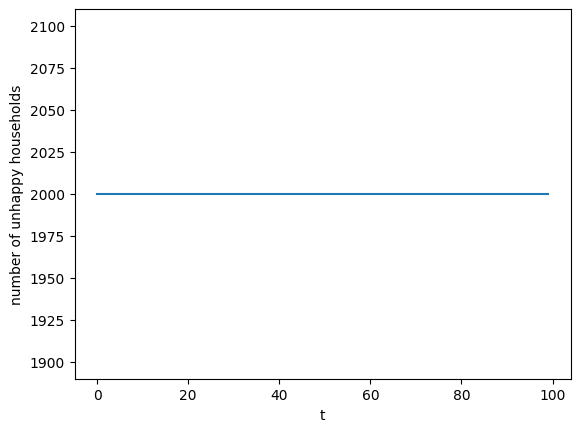

In [ ]:
plt.plot(M)
#plt.axis([0,100,1800,1830])
plt.xlabel('t')
plt.ylabel('number of unhappy households')
plt.show()

However, if we view the city after 100 turns, we find that it should still be possible to make some households happy.

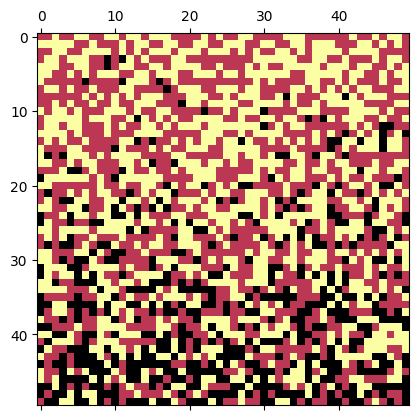

In [ ]:
# view the city
plt.matshow(city,cmap='inferno')
plt.axis('equal')
plt.show()

Therefore, let us run this simulation for $T = 10,000$ time steps,

In [ ]:
T = 10000
M = []
# run simulations
for t in range(T):
    # find unhappy households
    unhappy = satisfaction(city, 0.5)
    # record number of unhappy households
    M.append(len(unhappy))
    # move households
    city = move(city, vacant, unhappy)

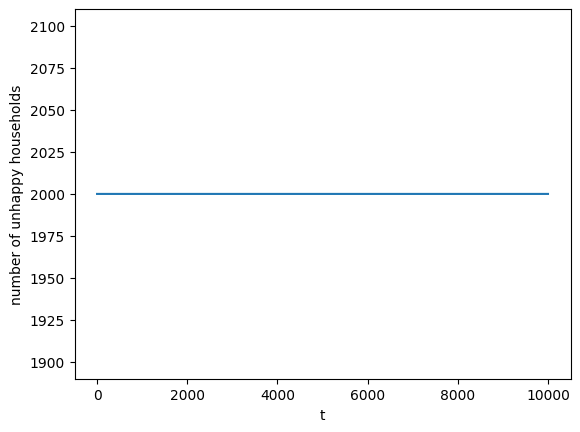

In [ ]:
plt.plot(M)
#plt.axis([0,100,1800,1830])
plt.xlabel('t')
plt.ylabel('number of unhappy households')
plt.show()

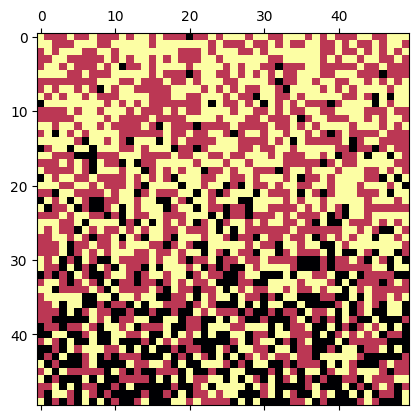

In [ ]:
# view the city
plt.matshow(city,cmap='inferno')
plt.axis('equal')
plt.show()

Unfortunately, picking a random vacant site to move to is not an efficient way to make the households happy. Therefore, even after 10,000 time steps, nothing much has happened.

## Further Exercises

### Simulating Schelling's Segregation Model for Different Values of $B$

So far, we have simulated Schelling's segregation model for $B = 0.2$ and $B = 0.5$.

In this exercise, explore other values of $B$.

In [116]:
def init_city(pops,L):# set N1 and N2
  # N1 = 1000
  # N2 = 1000
  # shuffle the array from 0 to 2499
  k = np.arange(L*L)
  np.random.shuffle(k)
  start = 0
  end = pops[0]
  ethic = 1
  city = np.zeros((L,L))
  for idx,p in enumerate(pops):
    for l in range(start,end):
        i = k[l]//L
        j = k[l] - i*L
        city[i,j] = ethic
    ethic += 1
    if idx == len(pops)-1: break
    start = end
    end = end + pops[idx+1]

  vacant = []
  for i in range(L):
      for j in range(L):
          if city[i,j] == 0.0:
              vacant.append([i,j])
  return city, vacant

In [117]:
res = {}
L = 50
# number of time steps to simulate
T = 50
# run simulations
for B in range(10,100,10):
  city, vacant = init_city([1000,1000],L)
  # initialize array to store number of unhappy households
  M = []
  for t in range(T):
      # find unhappy households
      unhappy = satisfaction(city, B/100)
      # record number of unhappy households
      M.append(len(unhappy))
      # move households
      city = move(city, vacant, unhappy)
  res["Ratio: "+str(B/100)] = M

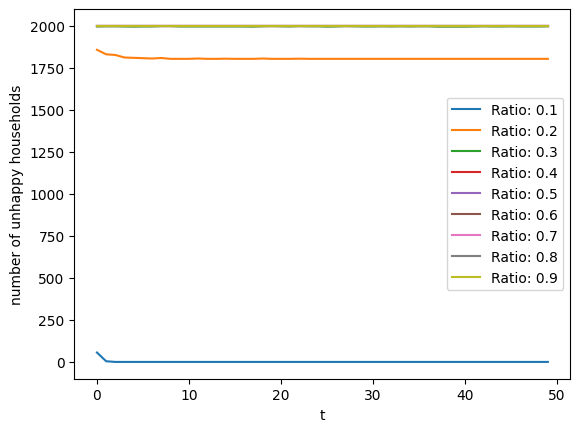

In [118]:
for key, value in res.items():
  plt.plot(value,label=key)
  plt.legend(loc='best')
  #plt.axis([0,100,1800,1830])
  plt.xlabel('t')
  plt.ylabel('number of unhappy households')
plt.show()

### Simulating Schelling's Segregation Model for Different Population Densities

So far, we have simulated Schelling's segregation model for $N = 2000$, which corresponds to a population density of $N/L^2 = 2000/2500 = 0.8$.

In this exercise, explore other population densities.


In [119]:
res = {}
L = 50
# number of time steps to simulate
T = 100
B = 0.2
# run simulations
for d in range(10,100,10):
  N = int(L*L*d/100)
  if 2*N >= L*L: break
  city, vacant = init_city([N,N],L)
  # initialize array to store number of unhappy households
  M = []
  for t in range(T):
      # find unhappy households
      unhappy = satisfaction(city, B)
      # record number of unhappy households
      M.append(len(unhappy))
      # move households
      city = move(city, vacant, unhappy)
  res["Density: "+str(d/100)] = M

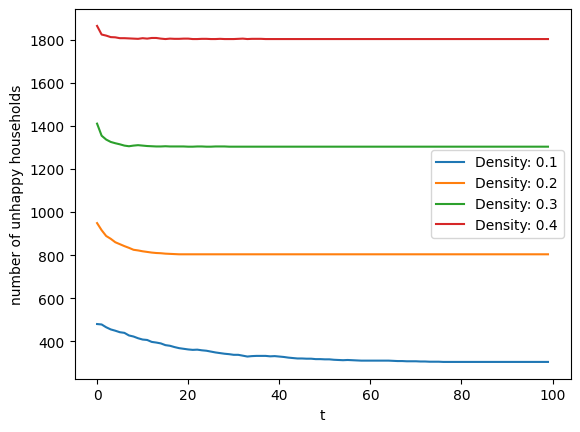

In [120]:
for key, value in res.items():
  plt.plot(value,label=key)
  plt.legend(loc='best')
  #plt.axis([0,100,1800,1830])
  plt.xlabel('t')
  plt.ylabel('number of unhappy households')
plt.show()

### Understanding More Deeply the Behavior of the Schelling's Segregation Model

In the two simulations we have done, at $B = 0.2$ and $B = 0.5$, we find 90\% and nearly 100\% of the households unhappy, for $N = 2000$ households.

Choose a more reasonable population density, and systematically run simulations over the whole range of $B$. If you make $B$ very small, can you make 100\% of the households happy? At what value of $B$ will 100\% of the households unhappy? Is it $B = \frac{1}{3}$ as Schelling claimed?

In [121]:
res = {}
L = 50
# number of time steps to simulate
T = 50
# run simulations
for B in range(10,60,10):
  for d in range(10,100,10):
    N = int(L*L*d/100)
    if 2*N >= L*L: break
    city, vacant = init_city([N,N],L)
    # initialize array to store number of unhappy households
    M = []
    for t in range(T):
        # find unhappy households
        unhappy = satisfaction(city, B/100)
        # record number of unhappy households
        M.append(len(unhappy))
        # move households
        city = move(city, vacant, unhappy)
    res[f"Ratio: {B/100}, Density: {d/100}"] = M

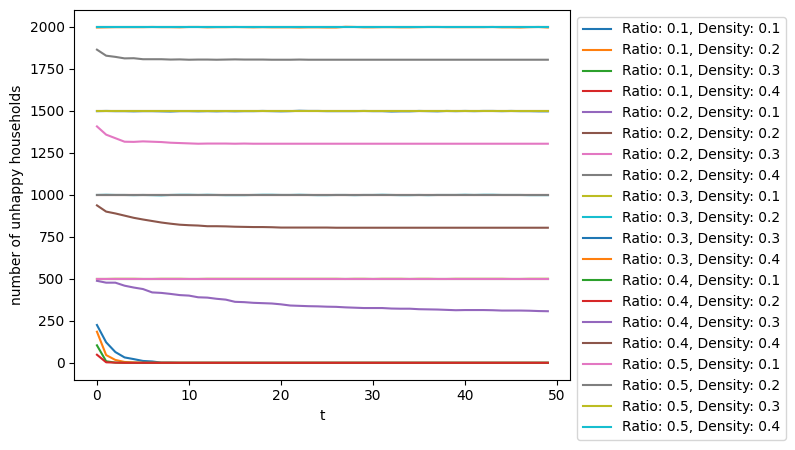

In [122]:
for key, value in res.items():
  plt.plot(value,label=key)
  plt.legend(loc='best',bbox_to_anchor=(1, 1))
  #plt.axis([0,100,1800,1830])
  plt.xlabel('t')
  plt.ylabel('number of unhappy households')
plt.show()

In [123]:
for key, value in res.items():
  if value[-1] == 2000:
    print("\nUnhappy")
    print(key)
  if value[-1] == 0:
    print("\nHappy")
    print(key)


Happy
Ratio: 0.1, Density: 0.1

Happy
Ratio: 0.1, Density: 0.2

Happy
Ratio: 0.1, Density: 0.3

Happy
Ratio: 0.1, Density: 0.4

Unhappy
Ratio: 0.4, Density: 0.4

Unhappy
Ratio: 0.5, Density: 0.4


## Complex Optional Exercises

### More Efficient Update Schemes

In the simulations shown above, we move an unhappy household to a random vacant site, without first checking whether the household will become happy.

Devise an update scheme where you will first check whether the household will become happy. If it does, accept the move. Else, accept the move with a probability $p$

In [187]:
import random
def move_better_place(city, vacant, unhappy,B,p=0.2):
    # in this function, we will move all unhappy households to
    # new sites. We can always do this because once an unhappy
    # household move away, its original site becomes vacant
    #
    # find number of unhappy households
    N = len(unhappy)
    # loop over all unhappy households
    for n in range(N):
      # original location of unhappy household
      i0 = unhappy[n][0]
      j0 = unhappy[n][1]
      tricker = True
      # random vacant site
      for k in range(len(vacant)):
        # new location to move to
        i1 = vacant[k][0]
        j1 = vacant[k][1]
        # household type
        c = int(city[i0,j0])
        # check neighbors
        nbrs = get_neighbors(i0, j0, city.shape[0], city.shape[1])
        # print(c,[city[i,j] for i,j in nbrs].count(c),[city[i,j] for i,j in nbrs].count(c)/len(nbrs))
        if [city[i,j] for i,j in nbrs].count(c)/len(nbrs) >= B:
          # update vacant site (i0,j0) -> (i1,j1)
          vacant[k] = [i0,j0]
          # update city
          city[i1,j1] = c
          city[i0,j0] = 0.0
          tricker = False
          break
      if tricker and random.random() > p:
        k = np.random.randint(len(vacant))
        # new location to move to
        i1 = vacant[k][0]
        j1 = vacant[k][1]
        # household type
        c = int(city[i0,j0])
        # update vacant site (i0,j0) -> (i1,j1)
        vacant[k] = [i0,j0]
        # update city
        city[i1,j1] = c
        city[i0,j0] = 0.0
    return city

def get_neighbors(i0, j0, max_i, max_j):
  neighbors = []
  # Define the relative positions of neighbors
  steps = [(-1, 0), (1, 0), (0, -1), (0, 1),  # up, down, left, right
            (-1, -1), (-1, 1), (1, -1), (1, 1)]   # diagonal
  for step in steps:
      ni, nj = i0 + step[0], j0 + step[1]
      # Check boundary conditions
      if 0 <= ni < max_i and 0 <= nj < max_j:
          neighbors.append((ni, nj))
  return neighbors

In [188]:
# initialize array to store number of unhappy households
M = []
# number of time steps to simulate
T = 1000
B = 0.2
# run simulations
for t in range(T):
  # find unhappy households
  unhappy = satisfaction(city, B)
  # record number of unhappy households
  M.append(len(unhappy))
  # move households
  city = move_better_place(city, vacant, unhappy,B)

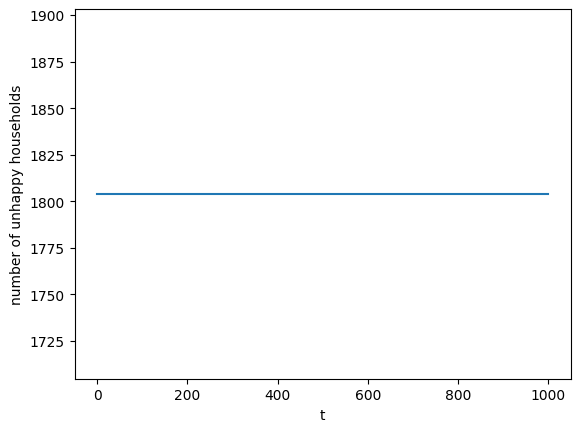

In [189]:
plt.plot(M)
#plt.axis([0,100,1800,1830])
plt.xlabel('t')
plt.ylabel('number of unhappy households')
plt.show()

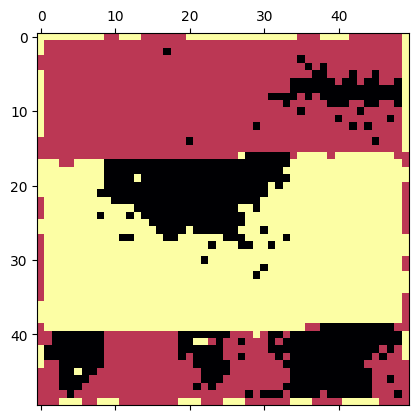

In [190]:
# view the city
plt.matshow(city,cmap='inferno')
plt.axis('equal')
plt.show()

### Anti-Segregation Schemes

In Singapore, specific laws were introduced to prevent segregation. If the proportions of races in the population are $f_j$, $j = 1, 2, \dots, K$ then in a given neighborhood, the proportion of households of race $j$ must be between $f_j \pm \delta f_j$.

Develop a simulation where the happiness of households are determined by their tolerance $B$, but they are not free to move to any vacant site. Instead, the proportions after the move must satisfy the above constraints.